<a href="https://colab.research.google.com/github/bigdatakang0000/START/blob/main/%EC%A1%B0%EB%B3%84%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%8B%A4%EC%8A%B5_kang_0110.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split  
from sklearn.model_selection import cross_val_score  
from sklearn.neighbors import KNeighborsRegressor     

In [5]:
df = pd.read_excel("/행정구역별_통계자료(2019,2020,2021).xlsx")
df.dropna(axis=0, inplace=True)

In [4]:
df.describe

<bound method NDFrame.describe of     행정구역별_ID    행정구역별   신혼부부_수  맞벌이_부부_수  평균_출생아_수  1인당_개인소득  1인당_지역총소득  \
0          0       전국  1101455    569472      0.80     22220      40571   
1          1    서울특별시   200477    118770      0.62     25256      54209   
2          2    부산광역시    62431     31683      0.79     21352      32014   
3          3    대구광역시    45094     22219      0.83     21046      29353   
4          4    인천광역시    65347     31551      0.81     21317      35818   
5          5    광주광역시    29596     15723      0.90     22472      32999   
6          6    대전광역시    30342     16157      0.82     22730      33810   
7          7    울산광역시    24721     11467      0.87     25165      59346   
8          8  세종특별자치시    11475      6905      0.82     22061      39730   
9          9      경기도   325067    168226      0.76     21937      41011   
10        10      강원도    31767     16088      0.89     21038      30858   
11        11     충청북도    34341     17441      0.90     21081      

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 0 to 53
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   행정구역별_ID     54 non-null     int64  
 1   행정구역별        54 non-null     object 
 2   신혼부부_수       54 non-null     int64  
 3   맞벌이_부부_수     54 non-null     int64  
 4   평균_출생아_수     54 non-null     float64
 5   1인당_개인소득     54 non-null     int64  
 6   1인당_지역총소득    54 non-null     int64  
 7   1인당_민간소비지출액  54 non-null     int64  
 8   총_가구         54 non-null     int64  
 9   주택소유_가구      54 non-null     int64  
 10  무주택_가구       54 non-null     int64  
 11  연도           54 non-null     int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 5.5+ KB


In [7]:
df.isnull().sum()

행정구역별_ID       0
행정구역별          0
신혼부부_수         0
맞벌이_부부_수       0
평균_출생아_수       0
1인당_개인소득       0
1인당_지역총소득      0
1인당_민간소비지출액    0
총_가구           0
주택소유_가구        0
무주택_가구         0
연도             0
dtype: int64

BP(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f490c2f28b0>, lines={'whiskers': [<matplotlib.lines.Line2D object at 0x7f490c3d15b0>, <matplotlib.lines.Line2D object at 0x7f490c3d1910>], 'caps': [<matplotlib.lines.Line2D object at 0x7f490c3d1c70>, <matplotlib.lines.Line2D object at 0x7f490c3d1fd0>], 'boxes': [<matplotlib.lines.Line2D object at 0x7f490c3d1250>], 'medians': [<matplotlib.lines.Line2D object at 0x7f490c3bf370>], 'fliers': [<matplotlib.lines.Line2D object at 0x7f490c3bf670>], 'means': []})

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45817 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48124 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48708 missing from current font.
  font.set_

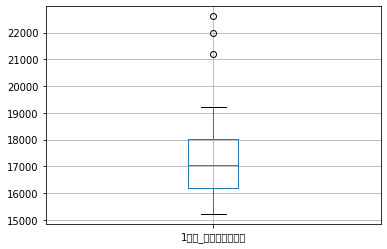

In [8]:
#이상치 찾기
df.boxplot(column="1인당_민간소비지출액", return_type="both")

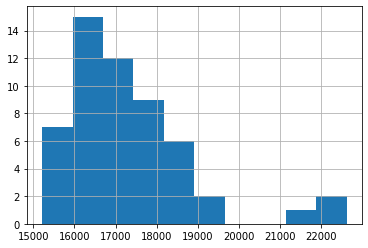

In [9]:
#히스토그램
df["1인당_민간소비지출액"].hist()

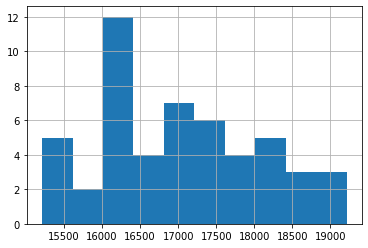

In [10]:
from scipy.sparse import data
#이상치 제거
q1 = df["1인당_민간소비지출액"].quantile(q=0.25)
q3 = df["1인당_민간소비지출액"].quantile(q=0.75)
IQR = q3 - q1

data_IQR = df[(df["1인당_민간소비지출액"] < q3 + IQR*1.5) & (df["1인당_민간소비지출액"] > q1 - IQR*1.5)] 
data_IQR["1인당_민간소비지출액"].hist()

In [11]:
#이상치 제거한 데이터값 df1에 넣기
df1 = data_IQR
df1     

,행정구역별_ID,행정구역별,신혼부부_수,맞벌이_부부_수,평균_출생아_수,1인당_개인소득,1인당_지역총소득,1인당_민간소비지출액,총_가구,주택소유_가구,무주택_가구,연도
0,0,전국,1101455,569472,0.80,22220,40571,18435,21448463,12062871,9385592,2021
2,2,부산광역시,62431,31683,0.79,21352,32014,18693,1431365,822769,608596,2021
3,3,대구광역시,45094,22219,0.83,21046,29353,18378,1000931,579620,421311,2021
4,4,인천광역시,65347,31551,0.81,21317,35818,17170,1183610,677602,506008,2021
5,5,광주광역시,29596,15723,0.90,22472,32999,18829,615693,354979,260714,2021
6,6,대전광역시,30342,16157,0.82,22730,33810,19146,640085,338038,302047,2021
7,7,울산광역시,24721,11467,0.87,25165,59346,19211,451432,289774,161658,2021
8,8,세종특별자치시,11475,6905,0.82,22061,39730,17198,145295,77538,67757,2021
9,9,경기도,325067,168226,0.76,21937,41011,17743,5290662,2960542,2330120,2021
10,10,강원도,31767,16088,0.89,21038,30858,17077,674728,391373,283355,2021


In [12]:
df1.columns

Index(['행정구역별_ID', '행정구역별', '신혼부부_수', '맞벌이_부부_수', '평균_출생아_수', '1인당_개인소득',
       '1인당_지역총소득', '1인당_민간소비지출액', '총_가구', '주택소유_가구', '무주택_가구', '연도'],
      dtype='object')

In [13]:
##모형기반 변수선택

from sklearn.feature_selection import SelectKBest, chi2 

#데이터(변수) 지정
X = df1.drop(["행정구역별", "1인당_민간소비지출액"], axis=1) 
Y = df1["1인당_민간소비지출액"]

#데이터 분할
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

#모형기반 변수선택

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

selector = SelectFromModel(RandomForestRegressor(n_estimators= 100, random_state= 0), threshold = "median") 

selector.fit(X_train, Y_train)

score = pd.DataFrame()
score["attribute"] = X_train.columns
score["support"] = selector.get_support()
score[score["support"] == True]

,attribute,support
0,행정구역별_ID,True
1,신혼부부_수,True
3,평균_출생아_수,True
4,1인당_개인소득,True
5,1인당_지역총소득,True
